In [58]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from keras.layers import Conv2D , Dense, MaxPool2D, Dropout, Flatten
from tensorflow.keras.preprocessing.image import array_to_img, img_to_array, load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers import *
from tensorflow.keras.callbacks import EarlyStopping
from keras.models import *
from matplotlib import image
import h5py
import os
from keras.preprocessing import image

In [59]:
normal = os.listdir(r"D:\project_dataset\project_dataset\train\NORMAL")
covid = os.listdir(r"D:\project_dataset\project_dataset\train\PNEUMONIA")
pneumonia = os.listdir(r"D:\project_dataset\project_dataset\train\Viral Pneumonia")

In [60]:
print("No. of normal images are:",len(normal))
print("No. of covid-19 images are:",len(covid))
print("No. of pneumonia images are:",len(pneumonia))

No. of normal images are: 1341
No. of covid-19 images are: 3875
No. of pneumonia images are: 3739


<AxesSubplot:>

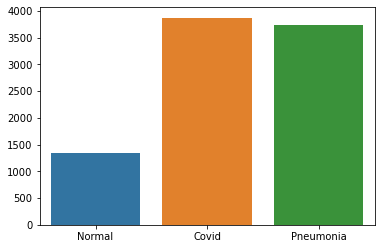

In [61]:
sns.barplot(x=["Normal","Covid","Pneumonia"],y=[len(normal),len(covid),len(pneumonia)])

Normal Image


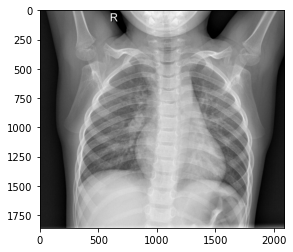

In [62]:
normal_image = load_img(r"D:\project_dataset\project_dataset\train\NORMAL\IM-0115-0001.jpeg")
print("Normal Image")
plt.imshow(normal_image)
plt.show()

Covid-19 Image


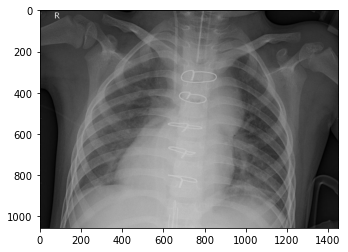

In [65]:
covid_image = load_img(r"D:\project_dataset\project_dataset\train\PNEUMONIA\person2_bacteria_3.jpeg")
print("Covid-19 Image")
plt.imshow(covid_image)
plt.show()

Pneumonia Image


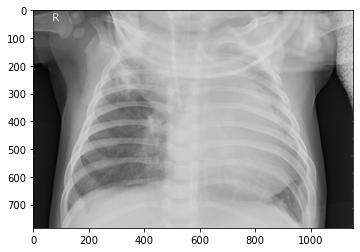

In [15]:
pneumonia_image = load_img(r"D:\project_dataset\project_dataset\train\PNEUMONIA\person23_bacteria_103.jpeg")
print("Pneumonia Image")
plt.imshow(pneumonia_image)
plt.show()

In [66]:
train_path = r"D:\project_dataset\project_dataset\train"
test_path =  r"D:\project_dataset\project_dataset\test"
val_path = r"D:\project_dataset\project_dataset\val"

In [67]:
train_datagen = ImageDataGenerator( 
                rescale = 1/255.0,
                rotation_range = 20,
                horizontal_flip = True,
                vertical_flip = True,
                fill_mode = 'nearest'
                )

In [68]:
valid_datagen = ImageDataGenerator(
                rescale = 1/255.0,
                rotation_range = 20,
                horizontal_flip=True,
                vertical_flip = True,
                fill_mode = 'nearest'
                )

In [69]:
test_datagen = ImageDataGenerator(
            rescale = 1/255.0)
batch_size = 16

In [70]:
train_generator = train_datagen.flow_from_directory(
            train_path,
            target_size =(224,224),
            batch_size = batch_size,
            class_mode = 'categorical')

Found 8955 images belonging to 3 classes.


In [71]:
train_generator.class_indices

{'NORMAL': 0, 'PNEUMONIA': 1, 'Viral Pneumonia': 2}

In [72]:
valid_generator = valid_datagen.flow_from_directory(
                    val_path,
                    target_size = (224,224),
                    batch_size = batch_size,
                    class_mode = 'categorical')

Found 16 images belonging to 2 classes.


In [73]:
valid_generator.class_indices

{'NORMAL': 0, 'PNEUMONIA': 1}

In [74]:
test_generator = test_datagen.flow_from_directory(
                  test_path,
                    target_size = (224,224),
                    batch_size = batch_size,
                    class_mode ='categorical')

Found 624 images belonging to 2 classes.


In [75]:
test_generator.class_indices

{'NORMAL': 0, 'PNEUMONIA': 1}

**CONVOLUTIONAL NEURAL NETWORK**

In [27]:
model1=Sequential()
model1.add(Conv2D(32,(3,3),activation='relu',input_shape=(256,256,3)))

model1.add(Conv2D(64,(3,3),activation='relu'))
model1.add(MaxPooling2D(pool_size=(2,2)))
model1.add(Dropout(0.3))

model1.add(Conv2D(128,(3,3),activation='relu'))
model1.add(MaxPooling2D(pool_size=(2,2)))
model1.add(Dropout(0.3))

model1.add(Conv2D(256,(3,3),activation='relu'))
model1.add(MaxPooling2D(pool_size=(2,2)))
model1.add(Dropout(0.3))

model1.add(Conv2D(256,(3,3),activation='relu'))
model1.add(MaxPooling2D(pool_size=(2,2)))
model1.add(Dropout(0.3))

model1.add(Flatten())
model1.add(Dense(64,activation='relu'))
model1.add(Dropout(0.5))

model1.add(Dense(3,activation='softmax'))

In [28]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 252, 252, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 126, 126, 64)      0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 126, 126, 64)      0         
                                                                 
 conv2d_2 (Conv2D)           (None, 124, 124, 128)     73856     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 128)       0         
 g2D)                                                 

In [35]:
model1.compile(loss='categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])

In [36]:
early_stop = EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=4)

In [ ]:
model1.fit(train_generator,validation_data = valid_generator,epochs = 1,batch_size=16,verbose=1,callbacks = [early_stop])

In [49]:
model1.history.history

{}

In [50]:
losses = pd.DataFrame(model1.history.history)

In [ ]:
val_acc = losses.drop(['accuracy','val_accuracy'],axis=1)

In [ ]:
val_acc.plot()

In [ ]:
val_loss = losses.drop(['loss','val_loss'],axis=1)

In [ ]:
val_loss.plot()

In [ ]:
print("The accuaracy of CNN model:",val_acc['val_accuracy'].max() *100)
print("The loss of CNN model:",val_losses['val_loss'].min()*100)

***VGG16 MODEL***

In [29]:
from keras.applications.vgg16 import VGG16

In [30]:
vgg16_model = VGG16(input_shape=(256,256,3), include_top = False, weights = 'imagenet',pooling='max')

In [31]:
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [54]:
# Load the VGG16 model
vgg16_model = tf.keras.applications.VGG16(
    include_top=False,  # Exclude the top layers
    weights='imagenet', # Use pre-trained weights
    input_shape=(224, 224, 3)  # Adjust input shape if necessary
)
print(vgg16_model.output_shape)  

# Freeze the layers of vgg16_model
for layer in vgg16_model.layers:
    layer.trainable = False

# Create the new model
model2 = Sequential()
model2.add(vgg16_model)  # Add the frozen VGG16 base
model2.add(Flatten())

# Add custom dense layers
model2.add(Dense(64, activation='relu'))
model2.add(Dense(32, activation='relu'))
model2.add(Dense(16, activation='relu'))
model2.add(Dense(3, activation='softmax'))  # For 3-class classification


(None, 7, 7, 512)


In [55]:
model2.compile(loss = 'categorical_crossentropy',optimizer = 'adam',metrics = ['accuracy'])

In [ ]:
model2.fit(train_generator,validation_data= valid_generator, epochs = 3, batch_size=16, verbose=1,callbacks = [early_stop])

Epoch 1/3


In [ ]:
result = pd.DataFrame(model2.history.history)
losses = result.drop(['accuracy','val_accuracy'],axis=1)
losses.plot()

In [ ]:
accuracy = result.drop(['loss','val_loss'],axis=1)
accuracy.plot()

In [ ]:
print("Testing accuracy of the VGG16 Model:",accuracy['val_accuracy'].max() *100)
print("testing loss of the VGG16 Model:",losses['val_loss'].min() *100)

***RESNETv50 MODEL***

In [76]:
from keras.applications import ResNet50V2

In [77]:
resnet_model = ResNet50V2(input_shape=(256,256,3),include_top = False,weights = 'imagenet',classes=3,pooling = 'max')
resnet_model.summary()

Model: "resnet50v2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_9 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 262, 262, 3)          0         ['input_9[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 128, 128, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 pool1_pad (ZeroPadding2D)   (None, 130, 130, 64)         0         ['conv1_conv[0][0]']          
                                                                                         

 tchNormalization)                                                                                
                                                                                                  
 conv2_block3_preact_relu (  (None, 64, 64, 256)          0         ['conv2_block3_preact_bn[0][0]
 Activation)                                                        ']                            
                                                                                                  
 conv2_block3_1_conv (Conv2  (None, 64, 64, 64)           16384     ['conv2_block3_preact_relu[0][
 D)                                                                 0]']                          
                                                                                                  
 conv2_block3_1_bn (BatchNo  (None, 64, 64, 64)           256       ['conv2_block3_1_conv[0][0]'] 
 rmalization)                                                                                     
          

 conv3_block2_1_relu (Activ  (None, 32, 32, 128)          0         ['conv3_block2_1_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv3_block2_2_pad (ZeroPa  (None, 34, 34, 128)          0         ['conv3_block2_1_relu[0][0]'] 
 dding2D)                                                                                         
                                                                                                  
 conv3_block2_2_conv (Conv2  (None, 32, 32, 128)          147456    ['conv3_block2_2_pad[0][0]']  
 D)                                                                                               
                                                                                                  
 conv3_block2_2_bn (BatchNo  (None, 32, 32, 128)          512       ['conv3_block2_2_conv[0][0]'] 
 rmalizati

                                                                                                  
 conv3_block4_3_conv (Conv2  (None, 16, 16, 512)          66048     ['conv3_block4_2_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv3_block4_out (Add)      (None, 16, 16, 512)          0         ['max_pooling2d_11[0][0]',    
                                                                     'conv3_block4_3_conv[0][0]'] 
                                                                                                  
 conv4_block1_preact_bn (Ba  (None, 16, 16, 512)          2048      ['conv3_block4_out[0][0]']    
 tchNormalization)                                                                                
                                                                                                  
 conv4_blo

 D)                                                                 0]']                          
                                                                                                  
 conv4_block3_1_bn (BatchNo  (None, 16, 16, 256)          1024      ['conv4_block3_1_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv4_block3_1_relu (Activ  (None, 16, 16, 256)          0         ['conv4_block3_1_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv4_block3_2_pad (ZeroPa  (None, 18, 18, 256)          0         ['conv4_block3_1_relu[0][0]'] 
 dding2D)                                                                                         
          

 conv4_block5_2_relu (Activ  (None, 16, 16, 256)          0         ['conv4_block5_2_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv4_block5_3_conv (Conv2  (None, 16, 16, 1024)         263168    ['conv4_block5_2_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv4_block5_out (Add)      (None, 16, 16, 1024)         0         ['conv4_block4_out[0][0]',    
                                                                     'conv4_block5_3_conv[0][0]'] 
                                                                                                  
 conv4_block6_preact_bn (Ba  (None, 16, 16, 1024)         4096      ['conv4_block5_out[0][0]']    
 tchNormal

                                                                                                  
 conv5_block2_preact_relu (  (None, 8, 8, 2048)           0         ['conv5_block2_preact_bn[0][0]
 Activation)                                                        ']                            
                                                                                                  
 conv5_block2_1_conv (Conv2  (None, 8, 8, 512)            1048576   ['conv5_block2_preact_relu[0][
 D)                                                                 0]']                          
                                                                                                  
 conv5_block2_1_bn (BatchNo  (None, 8, 8, 512)            2048      ['conv5_block2_1_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv5_blo

In [78]:
resnet_model = ResNet50V2(input_shape=(256,256,3),include_top = False,weights = 'imagenet',classes=3,pooling = 'max')

for layer in resnet_model.layers:
    layer.trainable = False

model3 = Sequential()
model3.add(resnet_model)
model3.add(Flatten())

model3.add(Dense(128, activation = "relu"))
model3.add(Dropout(0.2))
model3.add(Dense(3, activation = "softmax"))


In [79]:
model3.compile(loss = 'categorical_crossentropy',optimizer = 'adam',metrics = ['accuracy'])

In [80]:
model3.fit(train_generator,validation_data = valid_generator,epochs = 15, verbose=1)

Epoch 1/15
560/560 [==============================] - ETA: 0s - loss: 0.9722 - accuracy: 0.5164

InvalidArgumentError: Graph execution error:

Detected at node 'categorical_crossentropy/softmax_cross_entropy_with_logits' defined at (most recent call last):
    File "C:\Users\amogh\anaconda3\lib\runpy.py", line 197, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "C:\Users\amogh\anaconda3\lib\runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "C:\Users\amogh\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "C:\Users\amogh\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
      app.start()
    File "C:\Users\amogh\anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 677, in start
      self.io_loop.start()
    File "C:\Users\amogh\anaconda3\lib\site-packages\tornado\platform\asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "C:\Users\amogh\anaconda3\lib\asyncio\base_events.py", line 601, in run_forever
      self._run_once()
    File "C:\Users\amogh\anaconda3\lib\asyncio\base_events.py", line 1905, in _run_once
      handle._run()
    File "C:\Users\amogh\anaconda3\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "C:\Users\amogh\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 471, in dispatch_queue
      await self.process_one()
    File "C:\Users\amogh\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 460, in process_one
      await dispatch(*args)
    File "C:\Users\amogh\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 367, in dispatch_shell
      await result
    File "C:\Users\amogh\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 662, in execute_request
      reply_content = await reply_content
    File "C:\Users\amogh\anaconda3\lib\site-packages\ipykernel\ipkernel.py", line 360, in do_execute
      res = shell.run_cell(code, store_history=store_history, silent=silent)
    File "C:\Users\amogh\anaconda3\lib\site-packages\ipykernel\zmqshell.py", line 532, in run_cell
      return super().run_cell(*args, **kwargs)
    File "C:\Users\amogh\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2863, in run_cell
      result = self._run_cell(
    File "C:\Users\amogh\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2909, in _run_cell
      return runner(coro)
    File "C:\Users\amogh\anaconda3\lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "C:\Users\amogh\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3106, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "C:\Users\amogh\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3309, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "C:\Users\amogh\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3369, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\amogh\AppData\Local\Temp\ipykernel_20604\1073720257.py", line 1, in <cell line: 1>
      model3.fit(train_generator,validation_data = valid_generator,epochs = 15, verbose=1)
    File "C:\Users\amogh\anaconda3\lib\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\amogh\anaconda3\lib\site-packages\keras\src\engine\training.py", line 1791, in fit
      val_logs = self.evaluate(
    File "C:\Users\amogh\anaconda3\lib\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\amogh\anaconda3\lib\site-packages\keras\src\engine\training.py", line 2200, in evaluate
      logs = test_function_runner.run_step(
    File "C:\Users\amogh\anaconda3\lib\site-packages\keras\src\engine\training.py", line 4000, in run_step
      tmp_logs = self._function(dataset_or_iterator)
    File "C:\Users\amogh\anaconda3\lib\site-packages\keras\src\engine\training.py", line 1972, in test_function
      return step_function(self, iterator)
    File "C:\Users\amogh\anaconda3\lib\site-packages\keras\src\engine\training.py", line 1956, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\amogh\anaconda3\lib\site-packages\keras\src\engine\training.py", line 1944, in run_step
      outputs = model.test_step(data)
    File "C:\Users\amogh\anaconda3\lib\site-packages\keras\src\engine\training.py", line 1852, in test_step
      self.compute_loss(x, y, y_pred, sample_weight)
    File "C:\Users\amogh\anaconda3\lib\site-packages\keras\src\engine\training.py", line 1139, in compute_loss
      return self.compiled_loss(
    File "C:\Users\amogh\anaconda3\lib\site-packages\keras\src\engine\compile_utils.py", line 265, in __call__
      loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "C:\Users\amogh\anaconda3\lib\site-packages\keras\src\losses.py", line 142, in __call__
      losses = call_fn(y_true, y_pred)
    File "C:\Users\amogh\anaconda3\lib\site-packages\keras\src\losses.py", line 268, in call
      return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "C:\Users\amogh\anaconda3\lib\site-packages\keras\src\losses.py", line 2122, in categorical_crossentropy
      return backend.categorical_crossentropy(
    File "C:\Users\amogh\anaconda3\lib\site-packages\keras\src\backend.py", line 5566, in categorical_crossentropy
      return tf.nn.softmax_cross_entropy_with_logits(
Node: 'categorical_crossentropy/softmax_cross_entropy_with_logits'
logits and labels must be broadcastable: logits_size=[16,3] labels_size=[16,2]
	 [[{{node categorical_crossentropy/softmax_cross_entropy_with_logits}}]] [Op:__inference_test_function_37937]

In [ ]:
df = pd.DataFrame(model3.history.history)

In [ ]:
df_losses = df.drop(['loss','val_loss'],axis=1)
df_losses.plot()

In [ ]:
df_acc = df.drop(['accuracy','val_accuracy'],axis=1)
df_acc.plot()

In [ ]:
print("The accuracy of ResNet Model:",df_losses['val_accuracy'].max() * 100)
print("The loss of ResNet Model:",df_acc['val_loss'].min() *100)

In [ ]:
if 

****THE RESNET MODEL IS GIVING THE HIGHEST ACCURACY, HENCE THIS MODEL WILL BE USED FOR TESTING AS WELL AS FOR FINAL PREDICTIONS****

In [ ]:
from tensorflow.keras.preprocessing import image

In [ ]:
path = r"C:\Users\kush.parihar\Desktop\major project\val\Normal\057.jpeg"

In [ ]:
img = image.load_img(path, target_size = (256,256,3))
img = image.img_to_array(img)/255.0

img = np.array([img])
img.shape

In [ ]:
result = np.argmax(model3.predict(img))
print(result)
if result==0:
    print("COVID-19")
elif result==1:
    print("NORMAL")
elif result==2:
    print("VIRAL PNEUMONIA")

In [ ]:
model3.save("final_model.keras")

In [ ]:
loaded_model = load_model("final_model.keras")